<a href="https://colab.research.google.com/github/GuiSegabinassi/Dados_acoes/blob/main/acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
nasdaq = yf.download("^IXIC", 
                     period = "max")

jpmc = yf.download("JPMC34.SA",
                   period = "max")

blackrock = yf.download("BLK",
                        period = "max")

berkshire = yf.download("BRK-B",
                        period = "max")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

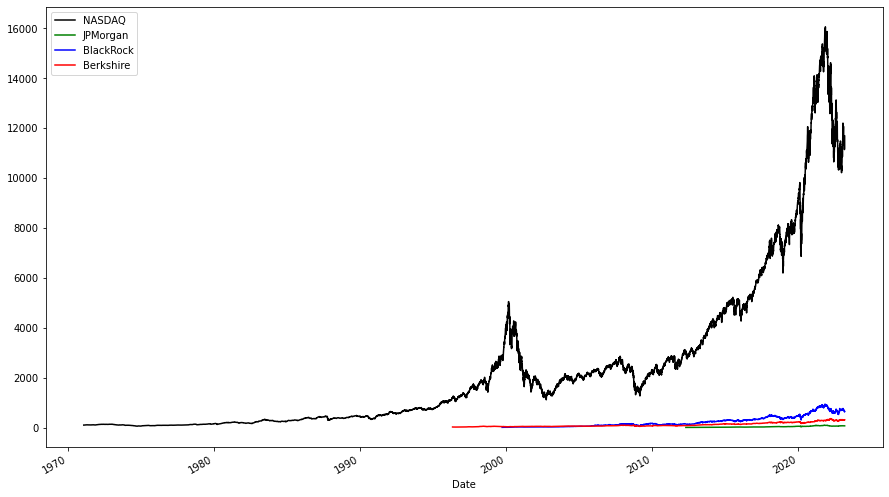

In [22]:
#Graficos com preço de fechamento ajustado
nasdaq["Adj Close"].plot(legend = True, label = "NASDAQ", color = "black", figsize = (15,9))
jpmc["Adj Close"].plot(legend = True, label = "JPMorgan", color = "green", figsize = (15,9))
blackrock["Adj Close"].plot(legend = True, label = "BlackRock", color = "blue", figsize = (15,9))
berkshire["Adj Close"].plot(legend = True, label = "Berkshire", color = "red", figsize = (15,9))

In [18]:
#Médias moveis
nasdaq["MM7"] = nasdaq["Adj Close"].rolling(7).mean()
jpmc["MM7"] = jpmc["Adj Close"].rolling(7).mean()
blackrock["MM7"] = blackrock["Adj Close"].rolling(7).mean()
berkshire["MM7"] = berkshire["Adj Close"].rolling(7).mean()

In [ ]:
nasdaq

In [9]:
dias = [ 15, 30]
for dia in dias:
  nasdaq["MM" +str(dia)] = nasdaq["Adj Close"].rolling(dia).mean()
  jpmc["MM" +str(dia)] = jpmc["Adj Close"].rolling(dia).mean()
  blackrock["MM" +str(dia)] = blackrock["Adj Close"].rolling(dia).mean()
  berkshire["MM" +str(dia)] = berkshire["Adj Close"].rolling(dia).mean()

In [ ]:
nasdaq[["Adj Close", "MM7", "MM15", "MM30"]].plot(legend = True, label = "JPMC", figsize = (15,9))

In [20]:
#Codigo para gráfico com todas as médias moveis de cada ação
#nasdaq[["Adj Close", "MM7", "MM15", "MM30"]].plot(legend = True, label = "Nasdaq", figsize = (15,9))
#jpmc[["Adj Close", "MM7", "MM15", "MM30"]].plot(legend = True, label = "JPMC", figsize = (15,9))
#blackrock[["Adj Close", "MM7", "MM15", "MM30"]].plot(legend = True, label = "BlackRock", figsize = (15,9))
#berkshire[["Adj Close", "MM7", "MM15", "MM30"]].plot(legend = True, label = "BerkShire", figsize = (15,9))

In [12]:
#Calcula o retorno diario
nasdaq["Daily Return"] = nasdaq["Adj Close"].pct_change()
jpmc["Daily Return"] = jpmc["Adj Close"].pct_change()
blackrock["Daily Return"] = blackrock["Adj Close"].pct_change() 
berkshire["Daily Return"] = berkshire["Adj Close"].pct_change()

In [13]:
nasdaq

,Open,High,Low,Close,Adj Close,Volume,MM7,MM15,MM30,Daily Return
Date,,,,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN,NaN
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,NaN,NaN,NaN,0.008400
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,NaN,NaN,NaN,-0.000793
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,NaN,NaN,NaN,-0.000695
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,NaN,NaN,NaN,0.007548
...,...,...,...,...,...,...,...,...,...,...
2023-03-10,11325.360352,11373.809570,11093.860352,11138.889648,11138.889648,6193500000,11487.328544,11499.018750,11676.908724,-0.017592
2023-03-13,11041.459961,11326.730469,10982.799805,11188.839844,11188.839844,6201490000,11448.165597,11459.123438,11662.479720,0.004484
2023-03-14,11357.730469,11467.019531,11284.929688,11428.150391,11428.150391,5533120000,11410.899972,11454.846810,11663.624414,0.021388


In [ ]:
#Grafico de retorno diario, ideal executar e vizualizar em linhas diferentes para um melhor entendimento
nasdaq["Daily Return"].plot(legend = True, label = "Nasdaq", figsize = (15,9))
jpmc["Daily Return"].plot(legend = True, label = "JPMC", figsize = (15,9))
blackrock["Daily Return"].plot(legend = True, label = "BlackRock", figsize = (15,9))
berkshire["Daily Return"].plot(legend = True, label = "BerkShire", figsize = (15,9))

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle("Probabilidade de retorno diario")

sns.distplot(nasdaq["Daily Return"], bins = 100, axlabel = "Retorno diario - Nasdaq", ax = axes[0, 0])
sns.distplot(jpmc["Daily Return"], bins = 100, axlabel = "Retorno diario - JPMC", ax = axes[0, 1])
sns.distplot(blackrock["Daily Return"], bins = 100, axlabel = "Retorno diario - BlackRock", ax = axes[1, 0])
sns.distplot(berkshire["Daily Return"], bins = 100, axlabel = "Retorno diario - BerkShire", ax = axes[1, 1]) 

In [16]:
df_all = pd.DataFrame({"Nasdaq": nasdaq["Adj Close"],
                      "JPMC": jpmc["Adj Close"],
                      "BlackRock": blackrock["Adj Close"],
                      "BerkShire": berkshire["Adj Close"]})

correlacao = df_all.corr()
correlacao

,Nasdaq,JPMC,BlackRock,BerkShire
Nasdaq,1.000000,0.981503,0.968920,0.946825
JPMC,0.981503,1.000000,0.972039,0.934646
BlackRock,0.968920,0.972039,1.000000,0.973503
BerkShire,0.946825,0.934646,0.973503,1.000000


<Axes: >

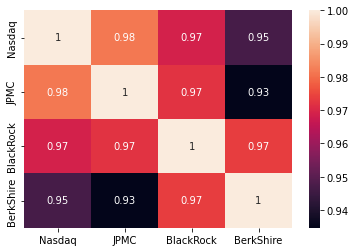

In [17]:
#mapa de calor para verificar a correlação
sns.heatmap(correlacao, annot = True)